Loads checkpoint by local backend from path: mmSeg_trained_models/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


C:\Users\yutse\AppData\Local\Temp\ipykernel_24648\1539245324.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', num_classes)(range(num_classes))[:, :3] * 255
C:\Users\yutse\AppData\Local\Temp\ipykernel_24648\1539245324.py:48: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yutse\AppData\Local\Temp\ipykernel_24648\1539245324.py:48: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yutse\AppData\Local\Temp\ipykernel_24648\1539245324.py:48: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yutse\AppData\Local\Temp\ipykernel_24648\1539245324.py:48: UserWarning: Glyp

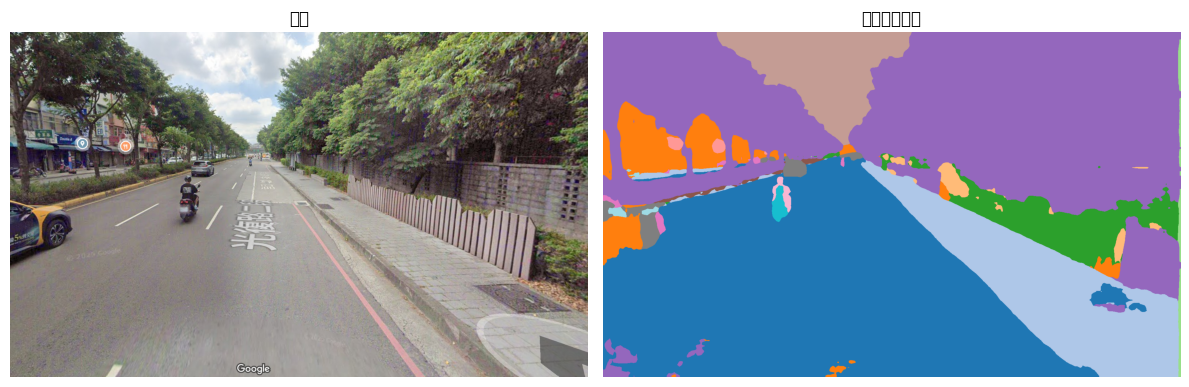

In [ ]:
import matplotlib.pyplot as plt
import mmcv
from mmseg.apis import inference_model, init_model
import torch
\
?# 模型設定與權重
config_file = 'mmSeg_trained_models/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'
checkpoint_file = 'mmSeg_trained_models/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

# 初始化模型
model = init_model(config_file, checkpoint_file, device='cuda:0')

# 測試影像
img_path = 'dataset/22.png'
img_bgr = mmcv.imread(img_path)
img_rgb = mmcv.bgr2rgb(img_bgr)

# 推論
result = inference_model(model, img_path)

# 可視化：使用 matplotlib 比對原圖與分割結果
seg_map = result.pred_sem_seg
if hasattr(seg_map, 'data'):
    seg_map = seg_map.data
if isinstance(seg_map, torch.Tensor):
    seg_map = seg_map.squeeze().cpu().numpy()
if seg_map.ndim == 3:
    seg_map = seg_map.argmax(axis=0)
seg_map = seg_map.astype(int)

# 簡單建立彩色顯示，依索引隨意配色
num_classes = len(model.dataset_meta['classes'])
colors = plt.cm.get_cmap('tab20', num_classes)(range(num_classes))[:, :3] * 255
seg_rgb = colors[seg_map].astype('uint8')

# 顯示原圖與分割結果
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('原圖')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(seg_rgb)
plt.title('語意分割結果')
plt.axis('off')

plt.tight_layout()
plt.show()
